In [1]:
import km3io as kio
import km3pipe as kp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
def stop_pos(f_,cuts_,track) :
    
    start_pos = [f_.events.tracks.pos_x[track][cuts_][:,0].__array__(),
                 f_.events.tracks.pos_y[track][cuts_][:,0].__array__(),
                 f_.events.tracks.pos_z[track][cuts_][:,0].__array__()]
    
    start_pos = np.stack(start_pos)

    tracklength = f_.events.tracks.fitinf[track][cuts_][:,0,10].__array__()

    stop_pos = np.stack([start_pos[0,:] + f_.events.tracks.dir_x[track][cuts_][:,0].__array__() * tracklength,
                        start_pos[1,:] + f_.events.tracks.dir_y[track][cuts_][:,0].__array__() * tracklength,
                        start_pos[2,:] + f_.events.tracks.dir_z[track][cuts_][:,0].__array__() * tracklength])
    
    return stop_pos, start_pos, tracklength

In [3]:
def DOM():
    """Reads DOM file and store list of positions, ids and dictionary"""


    #Read DOMS information on positions and id
    det = kp.hardware.Detector('/home/celestin/Documents/km3netdata_internship/ARCA/KM3NeT_00000075_20220408.detx')
    
    #Store position of DOMS in a np.array ([xxx][yyyy][zzzz])
    dom_x = []
    dom_y = []
    dom_z = []
    dom_id = []

    for dom,pos in det.dom_positions.items():
        dom_x.append(pos[0])
        dom_y.append(pos[1])
        dom_z.append(pos[2])
        dom_id.append(dom)
    
    dom_positions = np.array((dom_x,dom_y,dom_z))

    #Transpose the arrays to make a for loop for each distance
    dom_positions_bis = dom_positions.T
    

    #create dictionary of id vs index
    dict_id = {}
    for i in range(len(dom_positions_bis)):
        dict_id[i] = dom_id[i]
        
    return dom_positions_bis, dict_id

In [4]:
def plot3D(stop_pos,dom_positions,title=False):
    """Plots the stop positions in a 3D plot"""
    
    #3D plot stop positions cuts_bis

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')

    x = stop_pos[0]
    y = stop_pos[1]
    z = stop_pos[2]
    
    ax.scatter3D(dom_positions.T[0],dom_positions.T[1],dom_positions.T[2], s=50, c="red",depthshade=False, marker="o",label="second")
    ax.scatter3D(x, y, z,s=0.5,depthshade=False, marker=".",label="first")

    if type(title) != bool :
        ax.set_title(title)
    else :
        ax.set_title("Stop Positions")
    
    return ax

In [5]:
def plot1var(df,var,var_min=False,var_max=False,logscale_x=False,logscale_y=False,title=False) :
    fig, ax = plt.subplots (figsize = (7,7))
    
    if type(var_min) != bool and type(var_max) != bool :
        min_x = var_min
        max_x = var_max
    else :
        min_x = df[var].min()
        max_x = df[var].max()
        
    if logscale_x:
        ax.set_xscale('log')

    if logscale_y :
        ax.set_yscale('log')
        
    bins=np.linspace(min_x,max_x,150)
        
    ax.hist(df[var],bins)
    ax.set_xlabel(f'{var}')
    ax.set_xlim(min_x,max_x)
    
    if type(title) != bool :
        ax.set_title(title)
    else :
        ax.set_title(f'{var}')

    return ax

In [6]:
def plot1var_subplot(var,var_min=False,var_max=False,ymin=False,ymax=False,logscale_x=False,logscale_y=False,title=False) :

    nvar = len(var)

    if type(var_min) != bool and type(var_max) != bool :
        min_x = var_min
        max_x = var_max
    else :
        min_x = var[0].min()
        max_x = var[0].max()

    bins=np.linspace(min_x,max_x,150)

    fig, ax = plt.subplots(nvar,1)
    
    for i in range(nvar) :
        ax[i].hist(var[i],bins)
        if ymin != False and ymax != False :
            ax[i].set_yrange([0,4000])
        if type(title) != bool :
            ax[i].set_title(title[i])
        else :
            ax[i].set_title(f'{var[i]}')
        if logscale_x == True :
            ax[i].set_xscale('log')
        if logscale_y == True :
            ax[i].set_yscale('log')


    fig.tight_layout()

    return ax

In [7]:
def plot1var_overplot(df,var,var_min=False,var_max=False,logscale_x=False,logscale_y=False,title=False,var_names=False) :

    nvar = len(df)

    if type(var_min) != bool and type(var_max) != bool :
        min_x = var_min
        max_x = var_max
    else :
        min_x = df[0][var].min()
        max_x = df[0][var].max()

    bins=np.linspace(min_x,max_x,150)

    fig, ax = plt.subplots(figsize=(5,5))
    
    for i in range(nvar) :
        ax.hist(df[i][var],bins,label=var_names[i])
    if type(title) != bool :
        ax.set_title(title)
    else :
        ax.set_title(f'{var[0]}')
    if logscale_x == True :
        ax.set_xscale('log')
    if logscale_y == True :
        ax.set_yscale('log')
    ax.set_xlabel(f'{var}')
    ax.legend()

    fig.tight_layout()

    return ax

In [8]:
def plot1var_overplot_log(df,var,var_min=False,var_max=False,logscale_x=False,logscale_y=False,title=False,var_names=False) :

    nvar = len(df)

    if type(var_min) != bool and type(var_max) != bool :
        min_x = var_min
        max_x = var_max
    else :
        min_x = df[0][var].min()
        max_x = df[0][var].max()

    bins=np.linspace(min_x,max_x,150)

    fig, [ax, bx] = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
    
    for i in range(nvar) :
        ax.hist(df[i][var],bins,label=var_names[i])
        bx.hist(df[i][var],bins,label=var_names[i])
    if type(title) != bool :
        ax.set_title(title)
        bx.set_title(title)
    else :
        ax.set_title(f'{var[0]}')
        bx.set_title(f'{var[0]}')
    if logscale_x == True :
        bx.set_xscale('log')
    if logscale_y == True :
        bx.set_yscale('log')
    ax.set_xlabel(f'{var}')
    bx.set_xlabel(f'{var}')
    ax.legend()
    bx.legend()

    fig.tight_layout()

    return [ax,bx]

In [9]:
def plot2var(df,var1,var2,var1_min=False,var2_min=False,var1_max=False,var2_max=False,logscale_x=False,logscale_y=False) :
    
    fig, ax = plt.subplots (figsize = (7,7))

    if type(var1_min) != bool and type(var1_max) != bool :
        min_x = var1_min
        max_x = var1_max
    else :
        min_x = df[var1].min()
        max_x = df[var1].max()

    if type(var2_min) != bool and type(var2_max) != bool :
        min_y = var2_min
        max_y = var2_max
    else :
        min_y = df[var2].min()
        max_y = df[var2].max()
    
    if logscale_x:
        ax.set_xscale('log')
    bins_x=np.linspace(min_x,max_x,500)

    if logscale_y :
        ax.set_yscale('log')
    bins_y = np.linspace(min_y,max_y, 500)

    h2=ax.hist2d(df[var1],df[var2],bins=[bins_x,bins_y],norm=mpl.colors.LogNorm())
    ax.set_xlabel(f'{var1}')
    ax.set_ylabel(f'{var2}')
    ax.set_xlim(min_x,max_x)
    ax.set_ylim(min_y,max_y)
    ax.set_title(f'{var1} vs {var2}')
    fig.colorbar(h2[3])
    

    return h2

In [10]:
def plot2var_subplot(df,var1,var2,var1_min=False,var2_min=False,var1_max=False,var2_max=False,logscale_x=False,logscale_y=False,title=False) :
    
    if type(var1) == list :
        nvar=len(var1)*2
    else : nvar = 2

    plt.figure(figsize = (7,7))

    if type(var1_min) != bool and type(var1_max) != bool :
        min_x = var1_min
        max_x = var1_max
    else :
        min_x = df[0][var1].min()
        max_x = df[0][var1].max()

    if type(var2_min) != bool and type(var2_max) != bool :
        min_y = var2_min
        max_y = var2_max
    else :
        min_y = df[0][var2].min()
        max_y = df[0][var2].max()
    
    
    bins_x=np.linspace(min_x,max_x,150)

    
    bins_y = np.linspace(min_y,max_y, 150)

    for i in range(nvar) :
        plt.subplot(nvar,1,i+1)
        if logscale_x:
            plt.xscale('log')
        if logscale_y :
            plt.yscale('log')
        h2 = plt.hist2d(df[i][var1],df[i][var2],bins=[bins_x,bins_y],norm=mpl.colors.LogNorm())
        plt.xlabel(f'{var1}')
        plt.ylabel(f'{var2}')
        plt.colorbar(h2[3])
        if type(title) != bool :
            plt.title(title[i])

        plt.tight_layout()

    return

In [11]:
def plot2var_scatter(df,var1,var2,var1_min=False,var2_min=False,var1_max=False,var2_max=False,logscale_x=False,logscale_y=False,title=False,s=1) :
    
    if len(df) != 1 :
        n = len(df)
    else : 
        n = 1

    plt.figure(figsize = (7,7))

    for i in range(n) :
        plt.subplot(n,1,i+1)
        if logscale_x:
            plt.xscale('log')
        if logscale_y :
            plt.yscale('log')
        h2 = plt.plot(df[i][var1],df[i][var2],"o",markersize=s)
        plt.xlabel(f'{var1}')
        plt.ylabel(f'{var2}')
        if type(title) != bool :
            plt.title(title[i])
        if type(var1_min) != bool and type(var1_max) != bool :
            plt.xlim(var1_min,var1_max)
        if type(var2_min) != bool and type(var2_max) != bool :
            plt.ylim(var2_min,var2_max)
        plt.tight_layout()

    return

In [12]:
def linear(x1,y1,x2,y2) :
    m = (y1-y2)/(x1-x2)
    p = y1 - m * x1
    return m,p

In [13]:
def VolumeCut_cube(pos_stop,xred,yred,zinf,zsup):
    """Returns boolean list for cut based on stop positions inside a given volume, plus cuts in each direction
    Returns also the stop positions as a list of coordinates"""

    #Compute cuts_volume
    cuts_volume = []    
    
    #Define limits of our volume, taking into account the cut in each direction
    x_lim = [-29.5+xred,249.2-xred]
    y_lim = [107.05+yred,214.4-yred]
    z_lim = [0+zinf,689.164-zsup]

    #Loop over all events
    coordinates = []
    
    for i in range(len(pos_stop)):   
        
        x,y,z = pos_stop[i,0],pos_stop[i,1],pos_stop[i,2] #coordinates of points of the events
            
        if (z >= z_lim[0]) & (z <= z_lim[1]): #check if in z range
            
            if (y >= y_lim[0]) & (y <= y_lim[1]):  #check if in y range
                
                if (x >= x_lim[0]) & (x <= x_lim[1]):
                    cuts_volume.append(True)
                    coordinates.append([x,y,z])                   

                else:
                    cuts_volume.append(False)

            else:
                cuts_volume.append(False)
                
        else:
            cuts_volume.append(False)


    return cuts_volume, coordinates

In [14]:
def VolumeCut(pos_stop,zinf,zsup):
    """Returns boolean list for cut based on stop positions inside a given volume, plus cuts in each direction
    Returns also the stop positions as a list of coordinates"""

    #Compute cuts_volume
    cuts_volume = []
    
    z_lim = [0+zinf,689.164-zsup]
    
    m1,p1 = linear(-29.5,204.2,249.2,214.4)
    m2,p2 = linear(172.8,130.8,249.2,214.4)
    m3,p3 = linear(-29.5,204.2,51.85,180.35)
    m4,p4 = linear(51.85,180.35,116.9,107.05)
    m5,p5 = linear(116.9,107.05,172.8,130.8)

    coordinates = []
    pos_stop = pos_stop.T

    for i in range(len(pos_stop)):   
        
        x,y,z = pos_stop[i,0],pos_stop[i,1],pos_stop[i,2] #coordinates of points of the events
            
        if (z >= z_lim[0]) & (z <= z_lim[1]): #check if in z range
            
            if y >= 204.2 and y < 214.4 and x >= -29.5 and x <= 249.2  :
                ya=m1*x+p1
                xa=(y-p2)/m2
                if y<ya and x<xa :
                    cuts_volume.append(True)
                    coordinates.append([x,y,z])
                else :
                    cuts_volume.append(False)
            
            elif (y <= 204.2) & (y >= 180.35) & (x >= -29.5) & (x <= 249.2) :
                xa=(y-p3)/m3
                xb=(y-p2)/m2
                if x>=xa and x<= xb :
                    cuts_volume.append(True)
                    coordinates.append([x,y,z])
                else :
                    cuts_volume.append(False)

            elif (y <= 180.35) & (y >= 130.8) & (x >= 51.85) & (x <= 249.2) :
                xa=(y-p4)/m4
                xb=(y-p2)/m2
                if x>=xa and x<=xb :
                    cuts_volume.append(True)
                    coordinates.append([x,y,z])
                else :
                    cuts_volume.append(False)

            elif (y <= 130.8) & (y >= 107.05) & (x >= 51.85) & (x <= 172.8) :
                xa=(y-p4)/m4
                xb=(y-p5)/m5
                if x>=xa and x<= xb :
                    cuts_volume.append(True)
                    coordinates.append([x,y,z])
                else :
                    cuts_volume.append(False)

            else:
                cuts_volume.append(False)
                
        else:
            cuts_volume.append(False)


    return cuts_volume, coordinates

In [15]:
def newpos(f,haveTrk,cuts_2,cuts_volume, cuts_length = 0, complete = True):
    """For a given list of cut boolans lists, computes the strat, stop and track lenght positions"""
    
    
    if cuts_length == 0:
        #Array of initial position x, y and z coordinates for each event considering the cuts_2 and cuts_R_dom
        pos_start = [f.events.tracks.pos_x[haveTrk][cuts_2][cuts_volume][:,0].__array__(),f.events.tracks.pos_y[haveTrk][cuts_2][cuts_volume][:,0].__array__(),f.events.tracks.pos_z[haveTrk][cuts_2][cuts_volume][:,0].__array__()] 

        #Add all positions together, array of arrays
        pos_start = np.stack(pos_start)
    
        #Fitinf for each track of each event. Get all fitinf of 0th and 10th element of fitinf object (Trak lenght)
        trackLength = f.events.tracks.fitinf[haveTrk][cuts_2][cuts_volume][:,0,10].__array__()
        
        if complete :
            #stop postion, as pos start + track
            pos_stop_x  = pos_start[0,:] + f.events.tracks.dir_x[haveTrk][cuts_2][cuts_volume][:,0].__array__() * trackLength
            pos_stop_y  = pos_start[1,:] + f.events.tracks.dir_y[haveTrk][cuts_2][cuts_volume][:,0].__array__() * trackLength
            pos_stop_z  = pos_start[2,:] + f.events.tracks.dir_z[haveTrk][cuts_2][cuts_volume][:,0].__array__() * trackLength

             #Add all positions together, array of arrays
            pos_stop = np.stack((pos_stop_x, pos_stop_y, pos_stop_z))
            
            return pos_start, trackLength, pos_stop
        
        else:
            return pos_start, trackLength

            
    
    if cuts_length != 0:
    
        #Array of initial position x, y and z coordinates for each event considering the cuts_2 and cuts_R_dom
        pos_start = [f.events.tracks.pos_x[haveTrk][cuts_2][cuts_volume][cuts_length][:,0].__array__(),f.events.tracks.pos_y[haveTrk][cuts_2][cuts_volume][cuts_length][:,0].__array__(),f.events.tracks.pos_z[haveTrk][cuts_2][cuts_volume][cuts_length][:,0].__array__()] 

        #Add all positions together, array of arrays
        pos_start = np.stack(pos_start)
    
        #Fitinf for each track of each event. Get all fitinf of 0th and 10th element of fitinf object (Trak lenght)
        trackLength = f.events.tracks.fitinf[haveTrk][cuts_2][cuts_volume][cuts_length][:,0,10].__array__()
    
        if complete:
            #stop postion, as pos start + track
            pos_stop_x  = pos_start[0,:] + f.events.tracks.dir_x[haveTrk][cuts_2][cuts_volume][cuts_length][:,0].__array__()*trackLength
            pos_stop_y  = pos_start[1,:] + f.events.tracks.dir_y[haveTrk][cuts_2][cuts_volume][cuts_length][:,0].__array__()*trackLength
            pos_stop_z  = pos_start[2,:] + f.events.tracks.dir_z[haveTrk][cuts_2][cuts_volume][cuts_length][:,0].__array__()*trackLength

            #Add all positions together, array of arrays
            pos_stop = np.stack((pos_stop_x, pos_stop_y, pos_stop_z))
            
            return pos_start, trackLength, pos_stop
        
        else:
            return pos_start, trackLength

In [16]:
def cuts(file,E=2,lik=200,dir_z=0,zsup=0,zinf=0,EL=False) :
    
    f = kio.OfflineReader(file)
    
    n_events = len(f.events)

    haveTrk = np.array(f.events.n_tracks, dtype=bool)

    if type(EL) != bool :
        cuts = np.array((f.events.tracks.E[haveTrk][:,0] >= E) & (f.events.tracks.lik[haveTrk][:,0] >= lik) & (f.events.tracks.dir_z[haveTrk][:,0] <= dir_z)) & ((f.events.tracks.E[haveTrk][:,0]/f.events.tracks.fitinf[haveTrk][:,0,10]) <= EL)
    else :
        cuts = np.array((f.events.tracks.E[haveTrk][:,0] >= E) & (f.events.tracks.lik[haveTrk][:,0] >= lik) & (f.events.tracks.dir_z[haveTrk][:,0] <= dir_z))

    #Call pos_stop function to compute stop postions based on cuts_2, as well as start positions and tracklength
    pos_stop, pos_start, trackLength = stop_pos(f,cuts,haveTrk)
    
    #Call VolumeCut function to compute cuts_volume 
    cuts_volume = VolumeCut(pos_stop,zinf,zsup)[0]

    filtered_events = f.events[haveTrk][cuts][cuts_volume]

    print(filtered_events)

    pos_start, trackLength, pos_stop = newpos(f,haveTrk,cuts,cuts_volume, cuts_length = 0, complete = True)
    
    #Calculate % of filtered events
    n_filtered_events = len(filtered_events)
    print(str("{:.2f}".format((n_events-n_filtered_events)*100/n_events))+"% of events filtered")
    
    #Exception in case any event is selected
    if n_filtered_events == 0. :
        print("Filtration finished, any event selected")
    
    else :
        data_tuples = list(zip(filtered_events.id,filtered_events.run_id,filtered_events.frame_index,filtered_events.trigger_counter,filtered_events.n_hits,filtered_events.hits.id,filtered_events.hits.a,filtered_events.hits.channel_id,filtered_events.hits.dom_id,filtered_events.hits.t,filtered_events.hits.tdc,filtered_events.hits.pos_x,filtered_events.hits.pos_y,filtered_events.hits.pos_z,filtered_events.hits.dir_x,filtered_events.hits.dir_y,filtered_events.hits.dir_z,filtered_events.hits.tot,filtered_events.hits.trig,filtered_events.t_sec,filtered_events.t_ns,filtered_events.tracks.t[:,0].__array__(),filtered_events.events.tracks.E[:,0].__array__(),filtered_events.events.tracks.lik[:,0].__array__(),filtered_events.events.tracks.dir_x[:,0].__array__(),filtered_events.events.tracks.dir_y[:,0].__array__(),filtered_events.events.tracks.dir_z[:,0].__array__(),pos_start[0],pos_start[1],pos_start[2],trackLength,pos_stop[0],pos_stop[1],pos_stop[2],filtered_events.events.tracks.E[:,0].__array__()/trackLength,filtered_events.events.tracks.t[:,0].__array__()))
        df_cuts = pd.DataFrame(data_tuples, columns=['id','run_id','frame_index','trigger_counter','n_hits','hits_id','hits_amplitude','hits_channel_id','hits_dom_id','hits_t','hits_tdc','hits_pos_x','hits_pos_y','hits_pos_z','hits_dir_x','hits_dir_y','hits_dir_z','hits_tot','hits_trig','t_sec','t_ns','t_track','E_GeV',"lik","dir_x","dir_y","dir_z","start_x","start_y","start_z","L","stop_x","stop_y","stop_z","E/L","t"])


        return df_cuts

In [17]:
if __name__ == "__main__" :

    fileName = '/home/celestin/Documents/km3netdata_internship/ARCA_new/data.v7.0.retr.jchain.arca.aanet.100_dst_merged.root'
    df1_cut_z = 1
    df_1 = cuts(fileName,dir_z=df1_cut_z,zinf=0,zsup=0,E=0,lik=0)

<OfflineReader [400818/9658266] path='E/Evt'>
95.85% of events filtered


/tmp/ipykernel_14540/2634709889.py:35: RuntimeWarning: divide by zero encountered in true_divide
  data_tuples = list(zip(filtered_events.id,filtered_events.run_id,filtered_events.frame_index,filtered_events.trigger_counter,filtered_events.n_hits,filtered_events.hits.id,filtered_events.hits.a,filtered_events.hits.channel_id,filtered_events.hits.dom_id,filtered_events.hits.t,filtered_events.hits.tdc,filtered_events.hits.pos_x,filtered_events.hits.pos_y,filtered_events.hits.pos_z,filtered_events.hits.dir_x,filtered_events.hits.dir_y,filtered_events.hits.dir_z,filtered_events.hits.tot,filtered_events.hits.trig,filtered_events.t_sec,filtered_events.t_ns,filtered_events.tracks.t[:,0].__array__(),filtered_events.events.tracks.E[:,0].__array__(),filtered_events.events.tracks.lik[:,0].__array__(),filtered_events.events.tracks.dir_x[:,0].__array__(),filtered_events.events.tracks.dir_y[:,0].__array__(),filtered_events.events.tracks.dir_z[:,0].__array__(),pos_start[0],pos_start[1],pos_start[2],tr

In [18]:
    df2_cut_z = 1
    df_2 = cuts(fileName,dir_z=df2_cut_z,zinf=0,zsup=0,E=0,lik=50)

<OfflineReader [215320/9658266] path='E/Evt'>
97.77% of events filtered


/tmp/ipykernel_14540/2634709889.py:35: RuntimeWarning: divide by zero encountered in true_divide
  data_tuples = list(zip(filtered_events.id,filtered_events.run_id,filtered_events.frame_index,filtered_events.trigger_counter,filtered_events.n_hits,filtered_events.hits.id,filtered_events.hits.a,filtered_events.hits.channel_id,filtered_events.hits.dom_id,filtered_events.hits.t,filtered_events.hits.tdc,filtered_events.hits.pos_x,filtered_events.hits.pos_y,filtered_events.hits.pos_z,filtered_events.hits.dir_x,filtered_events.hits.dir_y,filtered_events.hits.dir_z,filtered_events.hits.tot,filtered_events.hits.trig,filtered_events.t_sec,filtered_events.t_ns,filtered_events.tracks.t[:,0].__array__(),filtered_events.events.tracks.E[:,0].__array__(),filtered_events.events.tracks.lik[:,0].__array__(),filtered_events.events.tracks.dir_x[:,0].__array__(),filtered_events.events.tracks.dir_y[:,0].__array__(),filtered_events.events.tracks.dir_z[:,0].__array__(),pos_start[0],pos_start[1],pos_start[2],tr

2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.


++ Detector: Parsing the DETX header
++ Detector: Reading PMT information...
++ Detector: Done.
++ Detector: Parsing the DETX header
++ Detector: Reading PMT information...


2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-05-25 15:32:49 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.


++ Detector: Done.


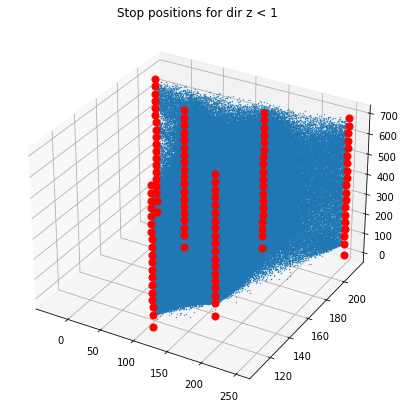

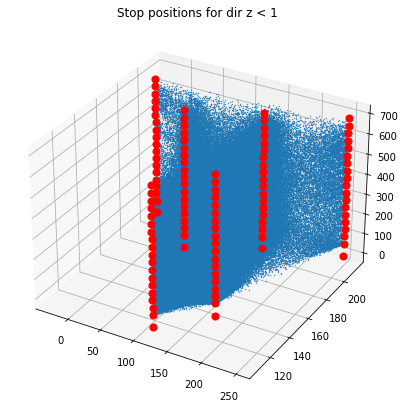

In [19]:
    # stop muons positions
    plot3D([df_1['stop_x'],df_1['stop_y'],df_1['stop_z']],DOM()[0],title='Stop positions for dir z < {}'.format(df1_cut_z))
    plot3D([df_2['stop_x'],df_2['stop_y'],df_2['stop_z']],DOM()[0],title='Stop positions for dir z < {}'.format(df2_cut_z))
    plt.show()

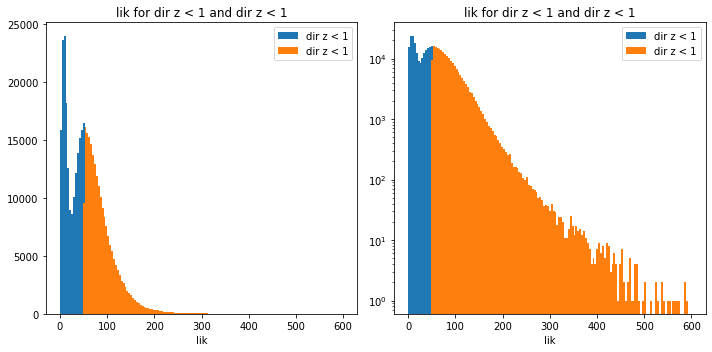

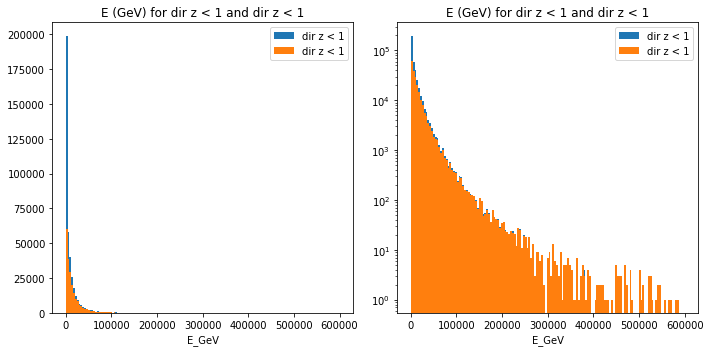

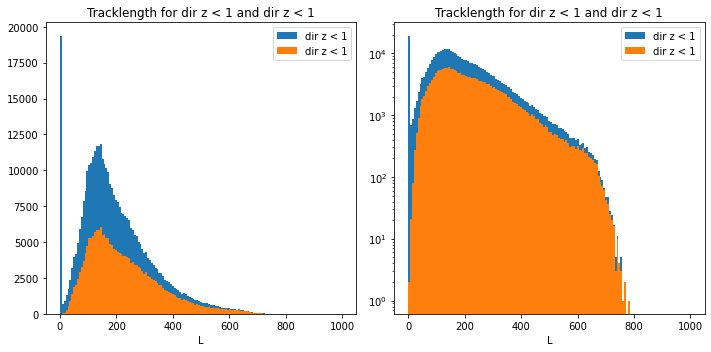

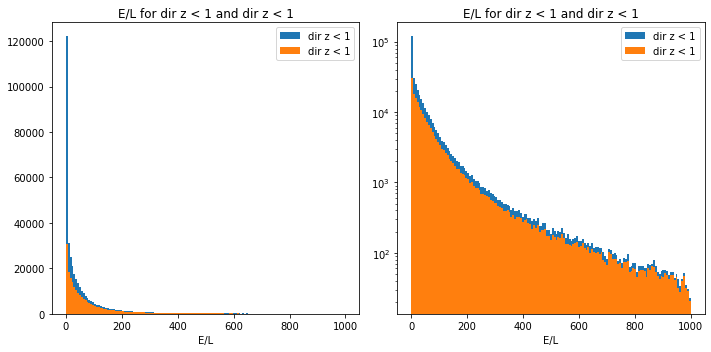

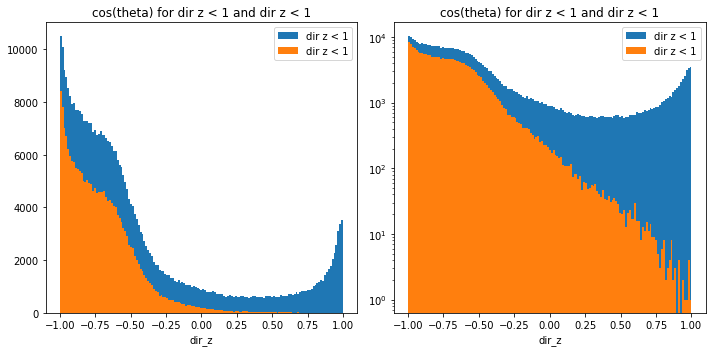

In [20]:
    plot1var_overplot_log([df_1,df_2],var='lik',var_min=0,var_max=600,logscale_y=True,title='lik for dir z < {} and dir z < {}'.format(df1_cut_z,df2_cut_z),var_names=['dir z < {}'.format(df1_cut_z),'dir z < {}'.format(df2_cut_z)])
    plot1var_overplot_log([df_1,df_2],var='E_GeV',var_min=0,var_max=0.6e6,logscale_y=True,title='E (GeV) for dir z < {} and dir z < {}'.format(df1_cut_z,df2_cut_z),var_names=['dir z < {}'.format(df1_cut_z),'dir z < {}'.format(df2_cut_z)])
    plot1var_overplot_log([df_1,df_2],var='L',var_min=0,var_max=1000,logscale_y=True,title='Tracklength for dir z < {} and dir z < {}'.format(df1_cut_z,df2_cut_z),var_names=['dir z < {}'.format(df1_cut_z),'dir z < {}'.format(df2_cut_z)])
    plot1var_overplot_log([df_1,df_2],var='E/L',var_min=0,var_max=1000,logscale_y=True,title='E/L for dir z < {} and dir z < {}'.format(df1_cut_z,df2_cut_z),var_names=['dir z < {}'.format(df1_cut_z),'dir z < {}'.format(df2_cut_z)])
    plot1var_overplot_log([df_1,df_2],var='dir_z',var_min=-1,var_max=1,logscale_y=True,title='cos(theta) for dir z < {} and dir z < {}'.format(df1_cut_z,df2_cut_z),var_names=['dir z < {}'.format(df1_cut_z),'dir z < {}'.format(df2_cut_z)])

    plt.show()

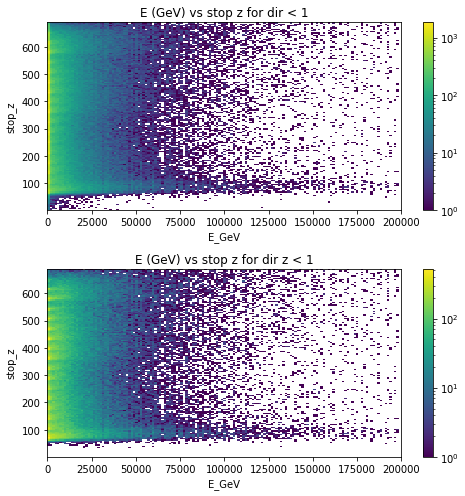

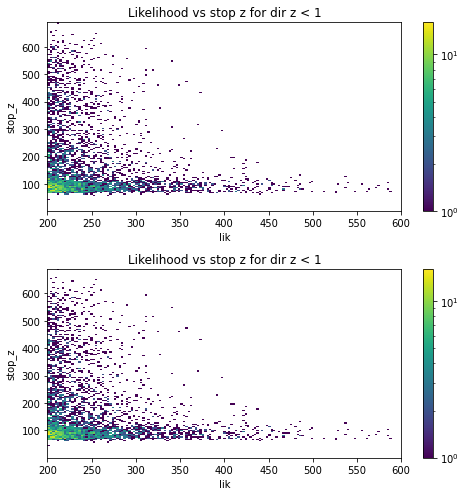

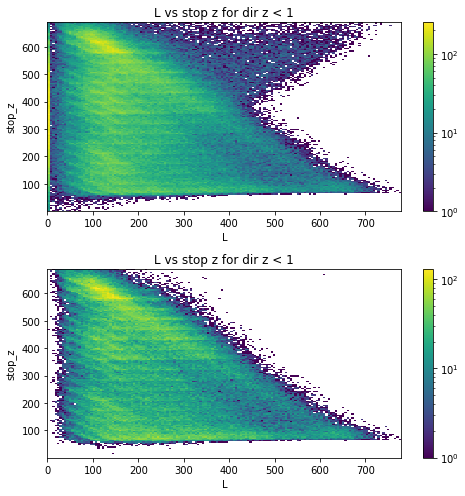

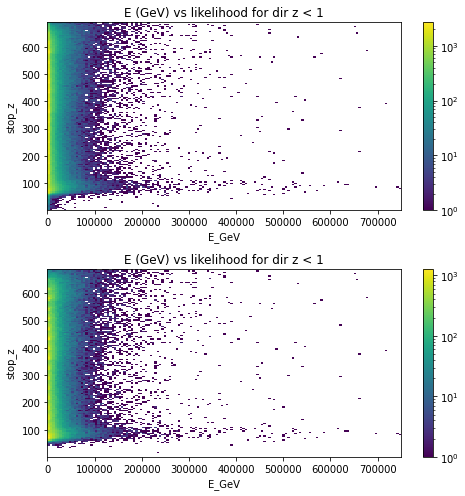

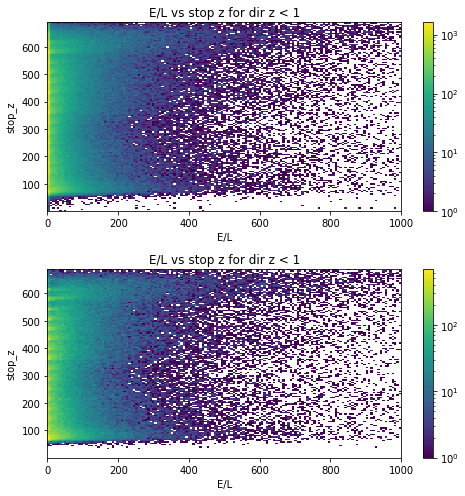

In [21]:
    plot2var_subplot(df=[df_1,df_2],var1='E_GeV',var2='stop_z',var1_min=0,var1_max=2e5,title=['E (GeV) vs stop z for dir < {}'.format(df1_cut_z),'E (GeV) vs stop z for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot(df=[df_1,df_2],var1='lik',var2='stop_z',var1_min=200,var1_max=600,title=['Likelihood vs stop z for dir z < {}'.format(df1_cut_z),'Likelihood vs stop z for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot(df=[df_1,df_2],var1='L',var2='stop_z',title=['L vs stop z for dir z < {}'.format(df1_cut_z),'L vs stop z for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot(df=[df_1,df_2],var1='E_GeV',var2='stop_z',var1_min=0,var1_max=0.75e6,title=['E (GeV) vs likelihood for dir z < {}'.format(df1_cut_z),'E (GeV) vs likelihood for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot(df=[df_1,df_2],var1='E/L',var2='stop_z',var1_min=0,var1_max=1000,title=['E/L vs stop z for dir z < {}'.format(df1_cut_z),'E/L vs stop z for dir z < {}'.format(df2_cut_z)])

    plt.show()

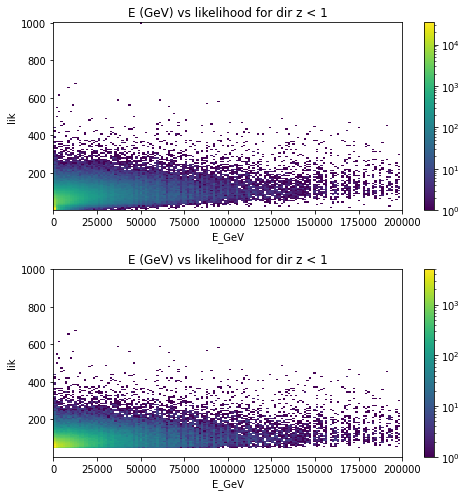

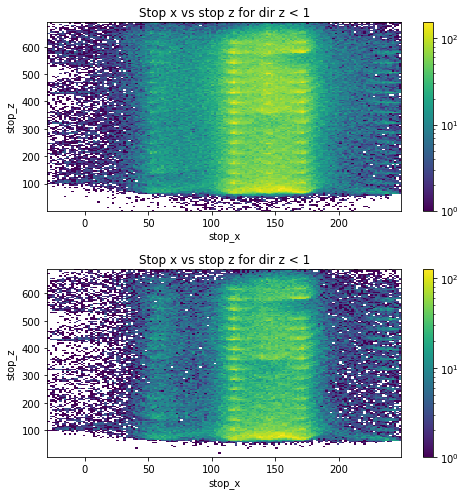

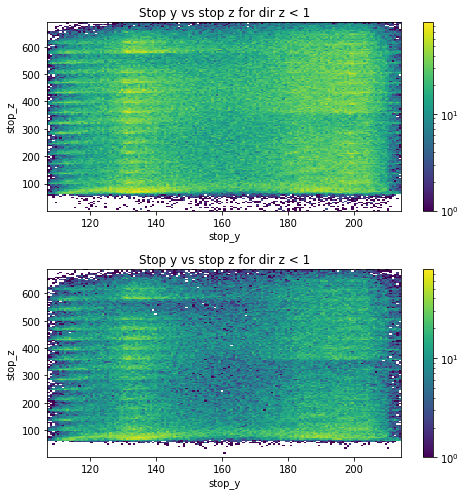

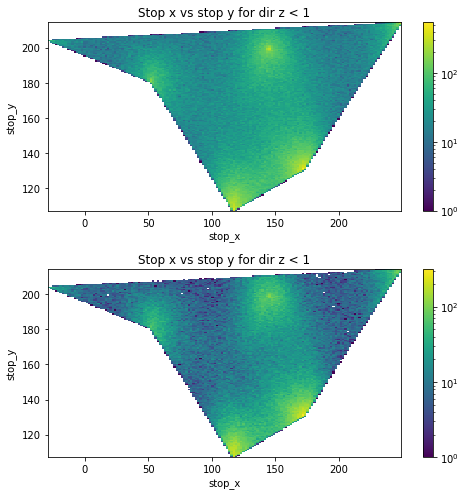

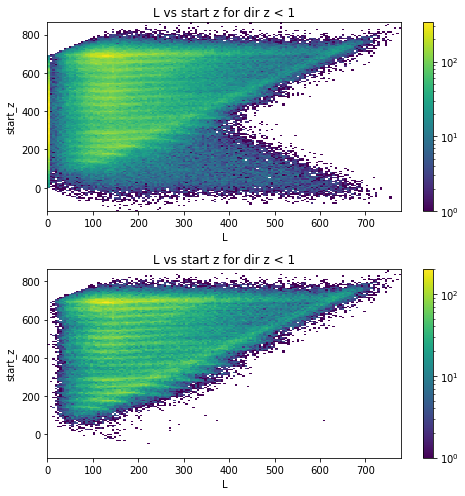

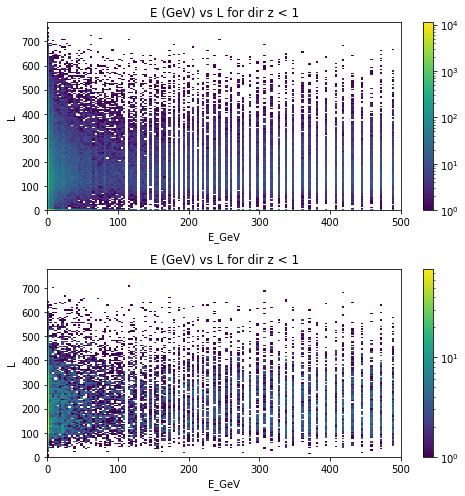

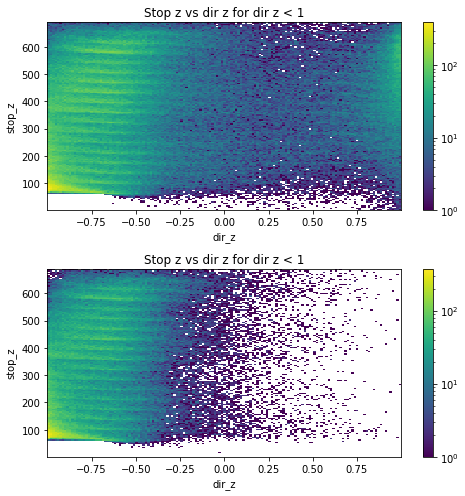

In [22]:
    plot2var_subplot([df_1,df_2],'E_GeV','lik',var1_min=0,var1_max=2e5,title=['E (GeV) vs likelihood for dir z < {}'.format(df1_cut_z),'E (GeV) vs likelihood for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot([df_1,df_2],'stop_x','stop_z',title=['Stop x vs stop z for dir z < {}'.format(df1_cut_z),'Stop x vs stop z for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot([df_1,df_2],'stop_y','stop_z',title=['Stop y vs stop z for dir z < {}'.format(df1_cut_z),'Stop y vs stop z for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot([df_1,df_2],'stop_x','stop_y',title=['Stop x vs stop y for dir z < {}'.format(df1_cut_z),'Stop x vs stop y for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot([df_1,df_2],'L','start_z',title=['L vs start z for dir z < {}'.format(df1_cut_z),'L vs start z for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot([df_1,df_2],'E_GeV','L',var1_min=0,var1_max=500,title=['E (GeV) vs L for dir z < {}'.format(df1_cut_z),'E (GeV) vs L for dir z < {}'.format(df2_cut_z)])
    plot2var_subplot([df_1,df_2],'dir_z','stop_z',title=['Stop z vs dir z for dir z < {}'.format(df1_cut_z),'Stop z vs dir z for dir z < {}'.format(df2_cut_z)])

    plt.show()